In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Set batch size
batch_size = 64

# Load MNIST dataset
train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 68476610.87it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 30193343.43it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 66151659.52it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 12777014.60it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



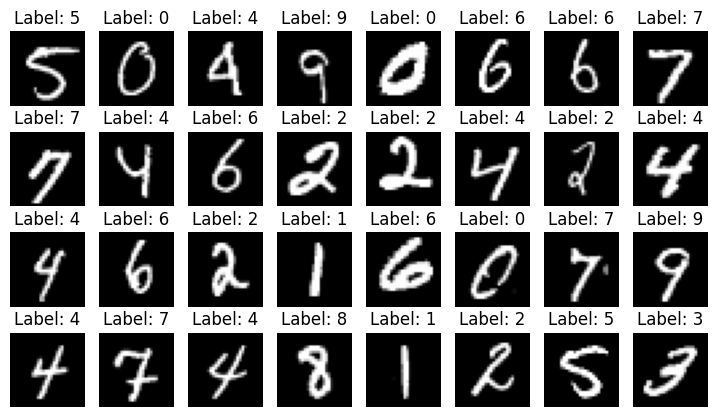

In [3]:
# Visualize a batch of MNIST images
def plot_images(images, labels, nrows, ncols):
    fig, axes = plt.subplots(nrows, ncols, figsize=(9, 5))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].view(28, 28), cmap='gray')
        ax.set_title(f"Label: {labels[i]}")
        ax.axis('off')

    plt.show()

# Visualize a batch of training images
images, labels = next(iter(train_loader))
plot_images(images, labels, nrows=4, ncols=8)

In [5]:
# Define Shallow Model
class ShallowModel(nn.Module):
    def __init__(self):
        super(ShallowModel, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [6]:
# Define Deeper Model
class DeeperModel(nn.Module):
    def __init__(self):
        super(DeeperModel, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        return x

In [7]:
# Define Deepest Model
class DeepestModel(nn.Module):
    def __init__(self):
        super(DeepestModel, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 256)
        self.fc4 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        x = torch.relu(x)
        x = self.fc4(x)
        return x

In [8]:
# Function to train and evaluate a model
def train_and_evaluate_model(model, train_loader, test_loader, num_epochs=10, lr=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Lists to store metrics
    accuracy_list = []
    f1_list = []
    precision_list = []
    recall_list = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(train_loader)}")
    print("Training complete")

    model.eval()
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_predictions.extend(predicted.numpy())
            all_labels.extend(labels.numpy())

    accuracy = accuracy_score(all_labels, all_predictions)
    f1 = f1_score(all_labels, all_predictions, average='weighted')
    precision = precision_score(all_labels, all_predictions, average='weighted')
    recall = recall_score(all_labels, all_predictions, average='weighted')

    return accuracy, f1, precision, recall

In [9]:
# Train and evaluate Shallow Model
shallow_model = ShallowModel()
shallow_accuracy, shallow_f1, shallow_precision, shallow_recall = train_and_evaluate_model(shallow_model, train_loader, test_loader)

Epoch 1/10, Loss: 0.4212203805825349
Epoch 2/10, Loss: 0.24236046503792438
Epoch 3/10, Loss: 0.18465189397462142
Epoch 4/10, Loss: 0.15447903778364283
Epoch 5/10, Loss: 0.13531394096623575
Epoch 6/10, Loss: 0.12063949595271016
Epoch 7/10, Loss: 0.1109391279044007
Epoch 8/10, Loss: 0.1024441396458142
Epoch 9/10, Loss: 0.0963548828742461
Epoch 10/10, Loss: 0.0902669522027646
Training complete


In [12]:
# Print results
print("Shallow Model Results:")
print(f"Accuracy: {shallow_accuracy}")
print(f"F1 Score: {shallow_f1}")
print(f"Precision: {shallow_precision}")
print(f"Recall: {shallow_recall}")

Shallow Model Results:
Accuracy: 0.9685
F1 Score: 0.9685002472500804
Precision: 0.9686466879023828
Recall: 0.9685


In [13]:
# Train and evaluate Deeper Model
deeper_model = DeeperModel()
deeper_accuracy, deeper_f1, deeper_precision, deeper_recall = train_and_evaluate_model(deeper_model, train_loader, test_loader)

Epoch 1/10, Loss: 0.3677599055529721
Epoch 2/10, Loss: 0.178377111225939
Epoch 3/10, Loss: 0.13232434910934554
Epoch 4/10, Loss: 0.10689166662291184
Epoch 5/10, Loss: 0.09090456468259682
Epoch 6/10, Loss: 0.07870060872353081
Epoch 7/10, Loss: 0.06739554718669964
Epoch 8/10, Loss: 0.06268831045450722
Epoch 9/10, Loss: 0.05436243658410266
Epoch 10/10, Loss: 0.051653511504501676
Training complete


In [16]:
# Print results
print("Deeper Model Results:")
print(f"Accuracy: {deeper_accuracy}")
print(f"F1 Score: {deeper_f1}")
print(f"Precision: {deeper_precision}")
print(f"Recall: {deeper_recall}")

Deeper Model Results:
Accuracy: 0.9735
F1 Score: 0.9735147370181297
Precision: 0.9737160275834227
Recall: 0.9735


In [17]:
# Train and evaluate Deepest Model
deepest_model = DeepestModel()
deepest_accuracy, deepest_f1, deepest_precision, deepest_recall = train_and_evaluate_model(deepest_model, train_loader, test_loader)

Epoch 1/10, Loss: 0.3293693635040827
Epoch 2/10, Loss: 0.14899231191041437
Epoch 3/10, Loss: 0.11208180709928671
Epoch 4/10, Loss: 0.09158491077118003
Epoch 5/10, Loss: 0.07855329907852719
Epoch 6/10, Loss: 0.07036517858532554
Epoch 7/10, Loss: 0.06238581033074545
Epoch 8/10, Loss: 0.05462088464625996
Epoch 9/10, Loss: 0.051496047681890804
Epoch 10/10, Loss: 0.04743657316442883
Training complete


In [21]:
# Print results
print("Deepest Model Results:")
print(f"Accuracy: {deepest_accuracy}")
print(f"F1 Score: {deepest_f1}")
print(f"Precision: {deepest_precision}")
print(f"Recall: {deepest_recall}")

Deepest Model Results:
Accuracy: 0.9761
F1 Score: 0.9761085180693375
Precision: 0.9762316470479685
Recall: 0.9761


Kesimpulan:

Berdasarkan hasil evaluasi dari tiga model yang berbeda (Shallow Model, Deeper Model, dan Deepest Model) pada dataset yang sama, terdapat beberapa kesimpulan:

1. Performa Model: Semakin dalam (deeper) arsitektur model, semakin tinggi performanya. Deepest Model memiliki tingkat akurasi, F1 Score, presisi, dan recall yang lebih tinggi dibandingkan dengan model-model lainnya. Ini menunjukkan bahwa model dengan arsitektur yang lebih kompleks cenderung memiliki kemampuan yang lebih baik dalam mengklasifikasikan gambar-gambar dalam dataset.

2. Overfitting: Meskipun Deeper Model dan Deepest Model memiliki performa yang lebih baik, perlu juga memperhatikan kemungkinan overfitting. Akurasi yang sangat tinggi pada Deepest Model mungkin mengindikasikan potensi overfitting, terutama jika model ini dilatih dengan jumlah data yang terbatas. Overfitting terjadi ketika model terlalu kompleks sehingga "menghafal" data pelatihan daripada memahaminya. Ini dapat mengakibatkan performa yang buruk pada data yang tidak terlihat sebelumnya.

Dalam perbandingan dengan hasil pada Task 3 (dengan akurasi sekitar 96%), dapat dilihat bahwa semua model yang baru memberikan hasil yang lebih baik. Oleh karena itu, peningkatan arsitektur model (dari Shallow ke Deeper dan Deepest) telah menghasilkan peningkatan kinerja yang signifikan dalam klasifikasi digit tulisan tangan. Namun, perlu diingat bahwa overfitting juga dapat menjadi masalah, terutama jika dataset yang dimiliki relatif kecil.